# Anomaly Detection

Датасет взят с https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv

In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler

from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.simplefilter("ignore", UserWarning)

In [168]:
data = pd.read_csv('creditcard.csv')
data.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0


In [169]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,237697.000000,237697.000000,237697.000000,237697.000000,237697.000000,237697.000000,237697.000000,237696.000000,237696.000000,237696.000000,...,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000
mean,81871.822821,-0.056071,-0.018314,0.142938,0.036314,-0.051214,0.024601,-0.020659,0.002256,0.001530,...,-0.004237,-0.017420,-0.008465,0.000459,0.030182,0.002341,-0.000286,0.001421,91.166845,0.001817
std,41002.214520,1.958947,1.673240,1.501620,1.414487,1.378383,1.325293,1.231280,1.205227,1.118834,...,0.743184,0.712807,0.643693,0.606529,0.512419,0.486523,0.402552,0.333792,252.237773,0.042593
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,48833.000000,-0.944731,-0.606249,-0.641402,-0.830881,-0.738647,-0.739742,-0.566363,-0.198608,-0.659212,...,-0.225502,-0.533684,-0.166238,-0.349938,-0.281698,-0.330711,-0.070262,-0.049305,6.000000,0.000000
50%,75233.000000,-0.021736,0.063992,0.331599,0.029093,-0.108948,-0.244119,0.015041,0.031032,-0.063551,...,-0.033047,-0.007017,-0.020704,0.046300,0.064976,-0.059379,0.002891,0.015005,23.490000,0.000000
75%,123559.000000,1.252520,0.780887,1.129056,0.819306,0.549477,0.427922,0.540745,0.331364,0.609558,...,0.172554,0.483697,0.130949,0.429272,0.369590,0.250693,0.089156,0.078029,79.990000,0.000000
max,149353.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237697 entries, 0 to 237696
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    237697 non-null  float64
 1   V1      237697 non-null  float64
 2   V2      237697 non-null  float64
 3   V3      237697 non-null  float64
 4   V4      237697 non-null  float64
 5   V5      237697 non-null  float64
 6   V6      237697 non-null  float64
 7   V7      237696 non-null  float64
 8   V8      237696 non-null  float64
 9   V9      237696 non-null  float64
 10  V10     237696 non-null  float64
 11  V11     237696 non-null  float64
 12  V12     237696 non-null  float64
 13  V13     237696 non-null  float64
 14  V14     237696 non-null  float64
 15  V15     237696 non-null  float64
 16  V16     237696 non-null  float64
 17  V17     237696 non-null  float64
 18  V18     237696 non-null  float64
 19  V19     237696 non-null  float64
 20  V20     237696 non-null  float64
 21  V21     23

# EDA

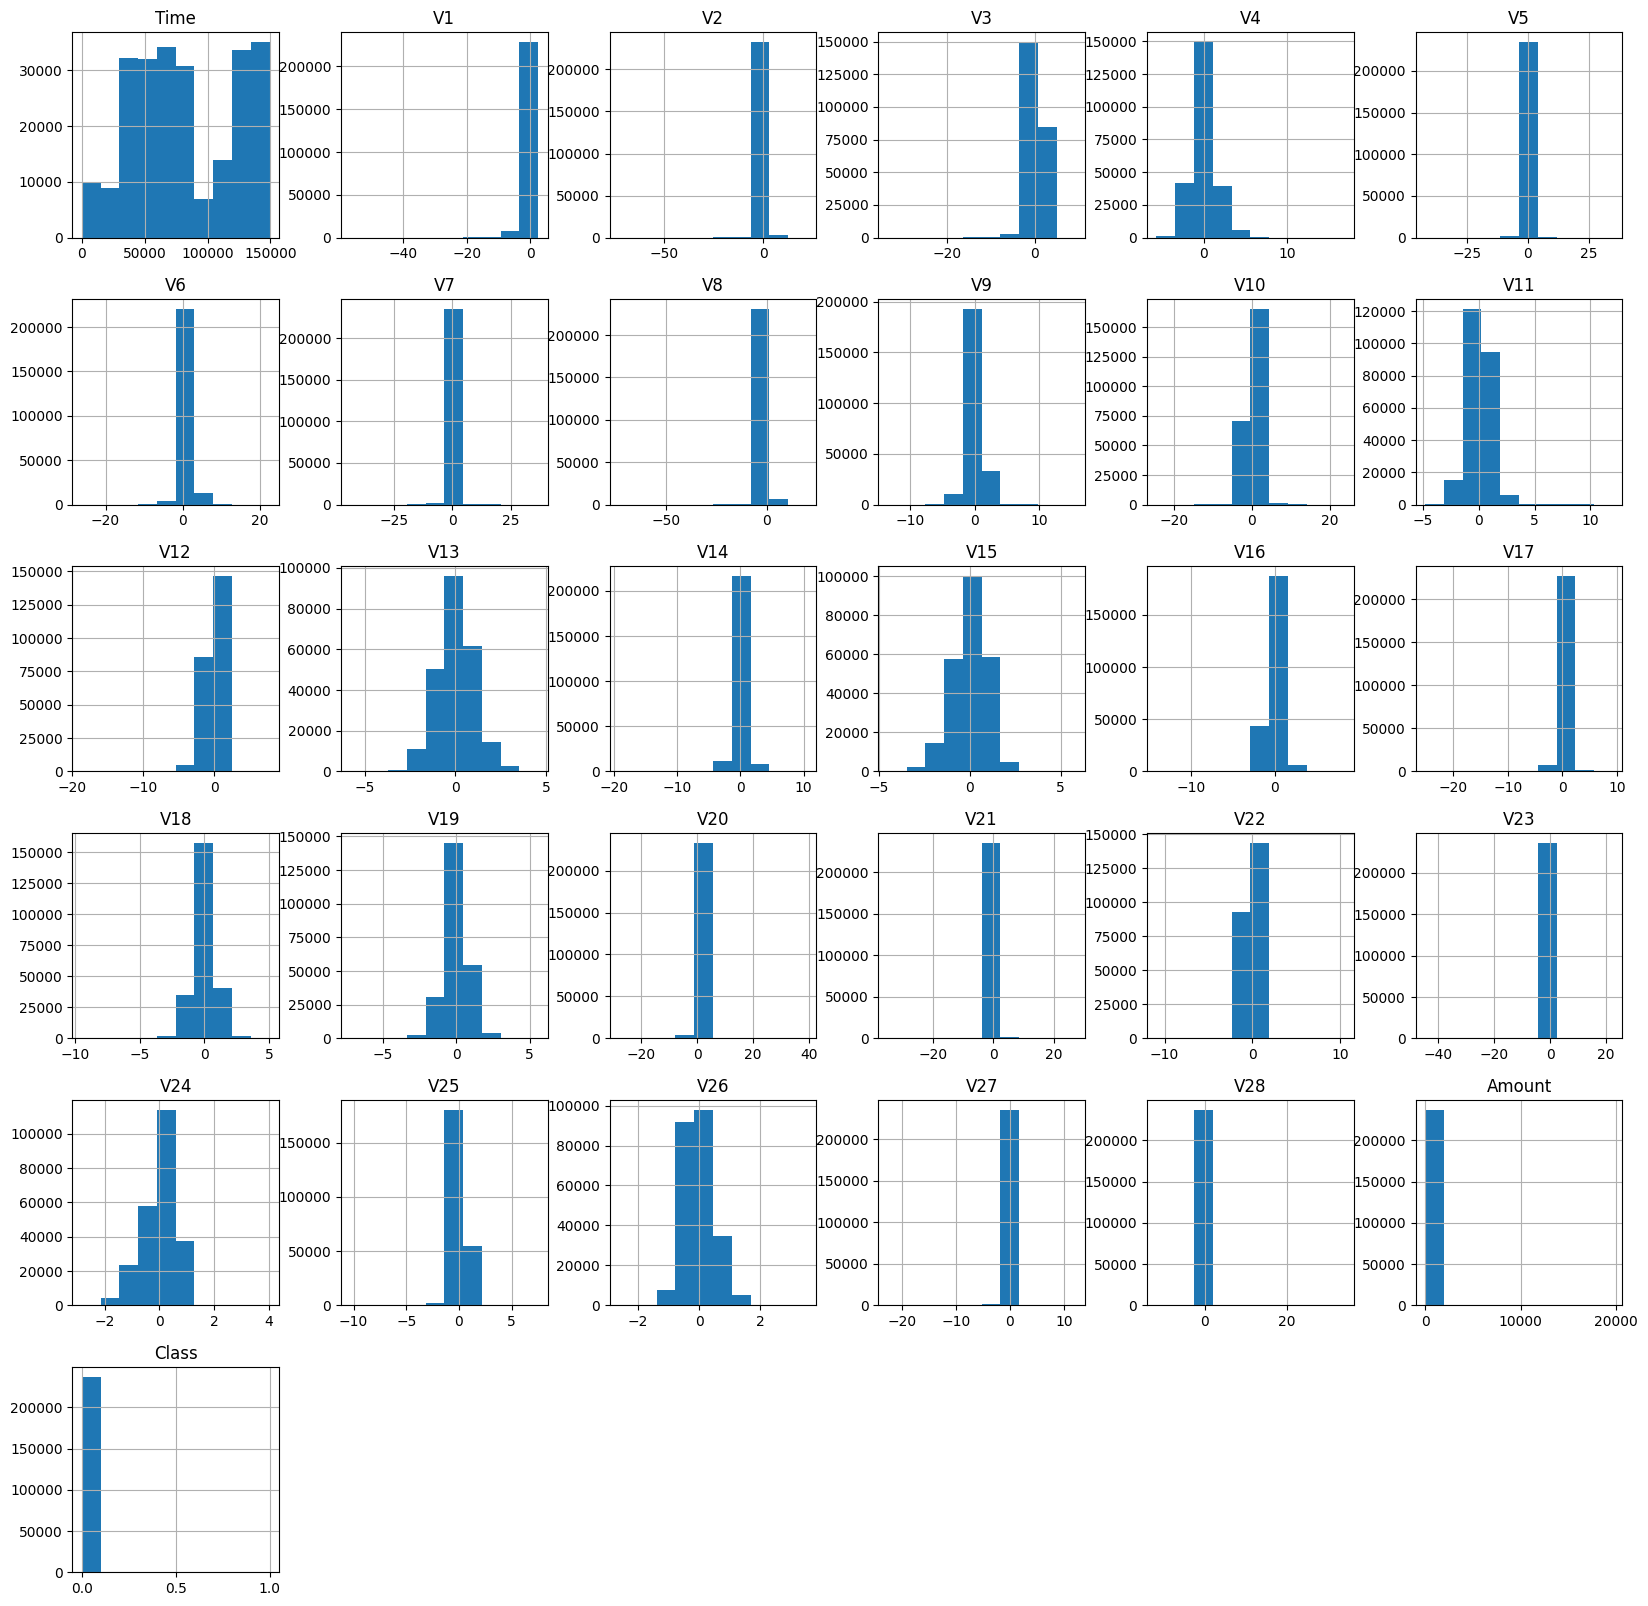

In [171]:
data.hist(figsize=(20, 20));

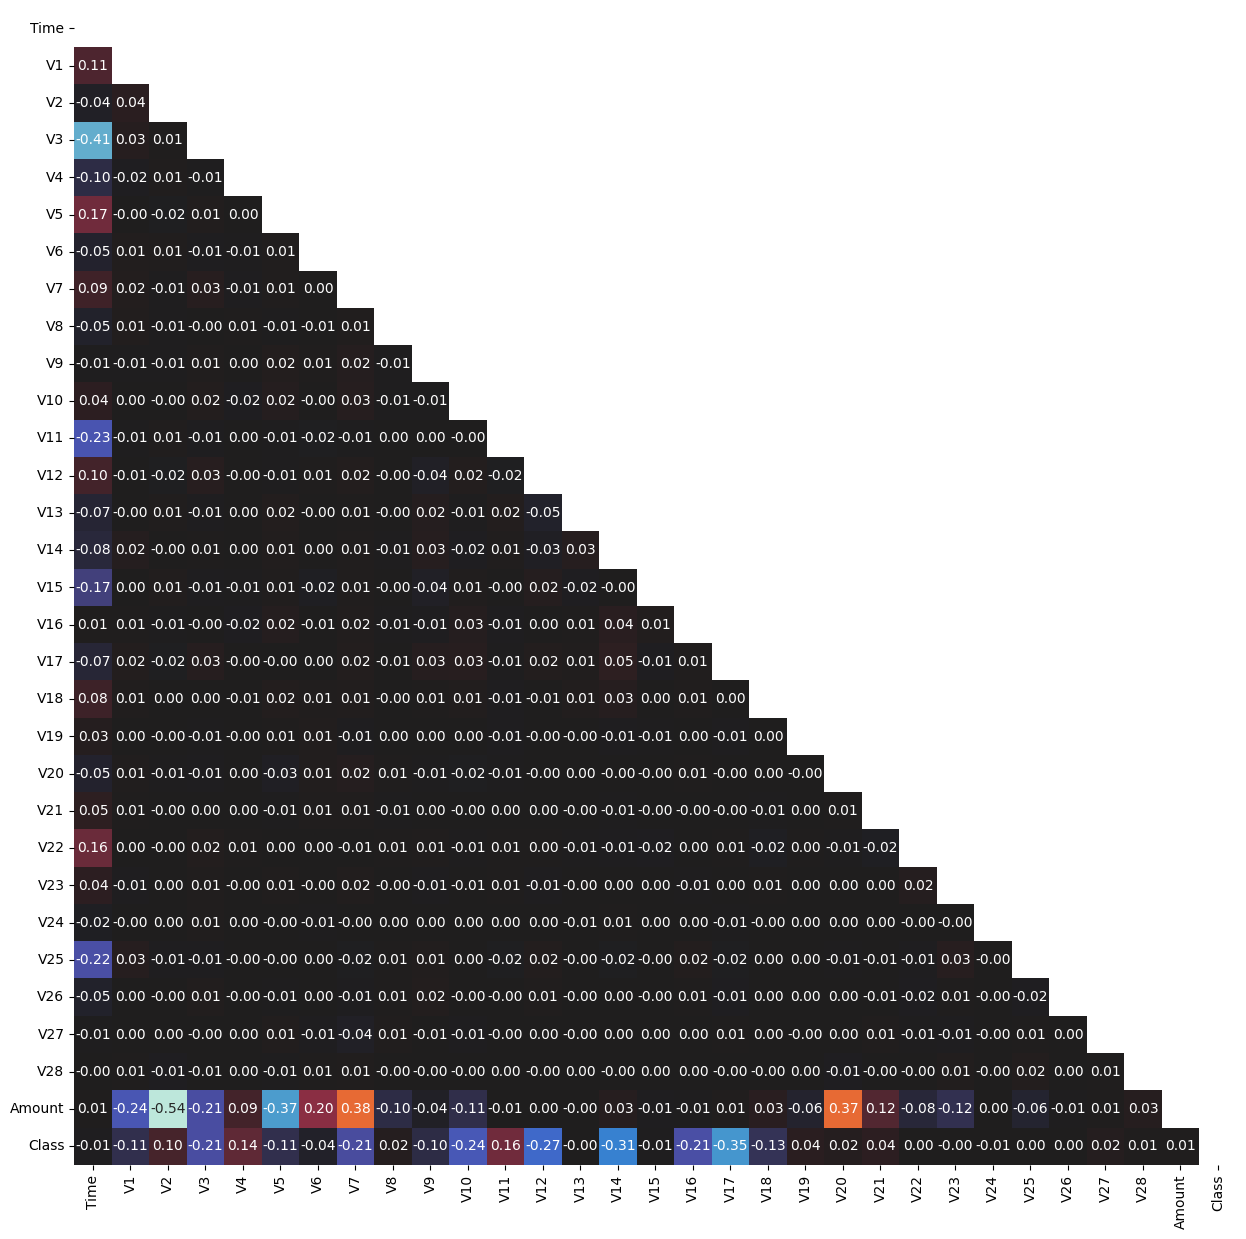

In [172]:
plt.figure(figsize=(15, 15))
corr_matrix = data.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))
sns.heatmap(lower, annot=True, fmt='.2f', cbar=False, center=0);

In [173]:
high_corr = [
    column for column in lower.columns if any((lower[column] > 0.5)|(lower[column] < -0.5))
]
high_corr

['V2']

In [174]:
other_features = [col for col in data.columns if col not in high_corr and col!='quality']

Удалим одну строчку с пропущенными значениями

In [178]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [179]:
data.dropna(axis=0, inplace=True)

**Воспользуемся процентом аномалий, подсчитанным по переменной Class, как "экспертной оценкой" загрязненности нашего датасета!**

In [182]:
data['Class'].value_counts()

0.0    237264
1.0       432
Name: Class, dtype: int64

In [ ]:
fraudulent_transactions = data['Class'].value_counts()[1]
print(f'All frauds transactions is {fraudulent_transactions} pcs')

In [183]:
print('No Frauds', round(data['Class'].value_counts()[0] / len(data) * 100, 2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1] / len(data) * 100, 2), '% of the dataset')

No Frauds 99.82 % of the dataset
Frauds 0.18 % of the dataset


**Метод 3-сигм**

In [134]:
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [135]:
def get_column_outliers(data, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[False]*len(data), index=data_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
    
    return comparison_table, outliers


In [136]:
def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))  

In [139]:
data_features = data.iloc[:, :-1]

In [140]:
comparison_table, std_outliers = get_column_outliers(data_features, columns=None)
anomalies_report(std_outliers)

Total number of outliers: 30870
Percentage of outliers:   12.99%


Если посмотреть на признаки, то можно заметить, что почти все они имеют нормальное распределение с матожиданием 0 и дисперсией около 1. Почти все признаки также на коррелируются друг с другом, что не удивительно, так как они получены в результате PCA и являются первыми 28 главными компонентами, а как мы знаем они несут какую-то новую информацию. Названия признаков нам не известны из-за типичности сферы данных (защита информации о пользователях кредитных карт. Классы не сбалансированны, так как 237262 транзакции относятся к нулевому классу и лишь 432 транзакции "подозрительные". Всего по датасету 12.99% выбросов (по методу 3-х сигм)

In [152]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
V27,1.207370,-1.207942,4067.0,1.711009
V6,4.000489,-3.951286,3897.0,1.639489
V20,2.364420,-2.349068,3893.0,1.637806
V2,5.001416,-5.038041,3590.0,1.510333
V8,3.617938,-3.613427,3505.0,1.474573
Amount,847.880164,-665.546473,3496.0,1.470786
V21,2.225316,-2.233789,3468.0,1.459006
V1,5.820759,-5.932919,3136.0,1.319332
V14,2.921236,-2.868043,2999.0,1.261696
V7,3.673182,-3.714500,2941.0,1.237295


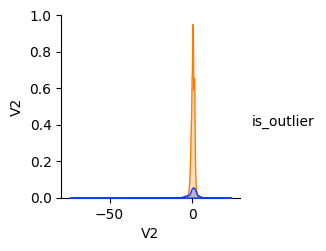

In [156]:
labeled_data = data_features[high_corr].copy()
labeled_data['is_outlier'] = std_outliers

sns.pairplot(data=labeled_data, vars = high_corr,
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'],  palette='bright');

**Box plot**

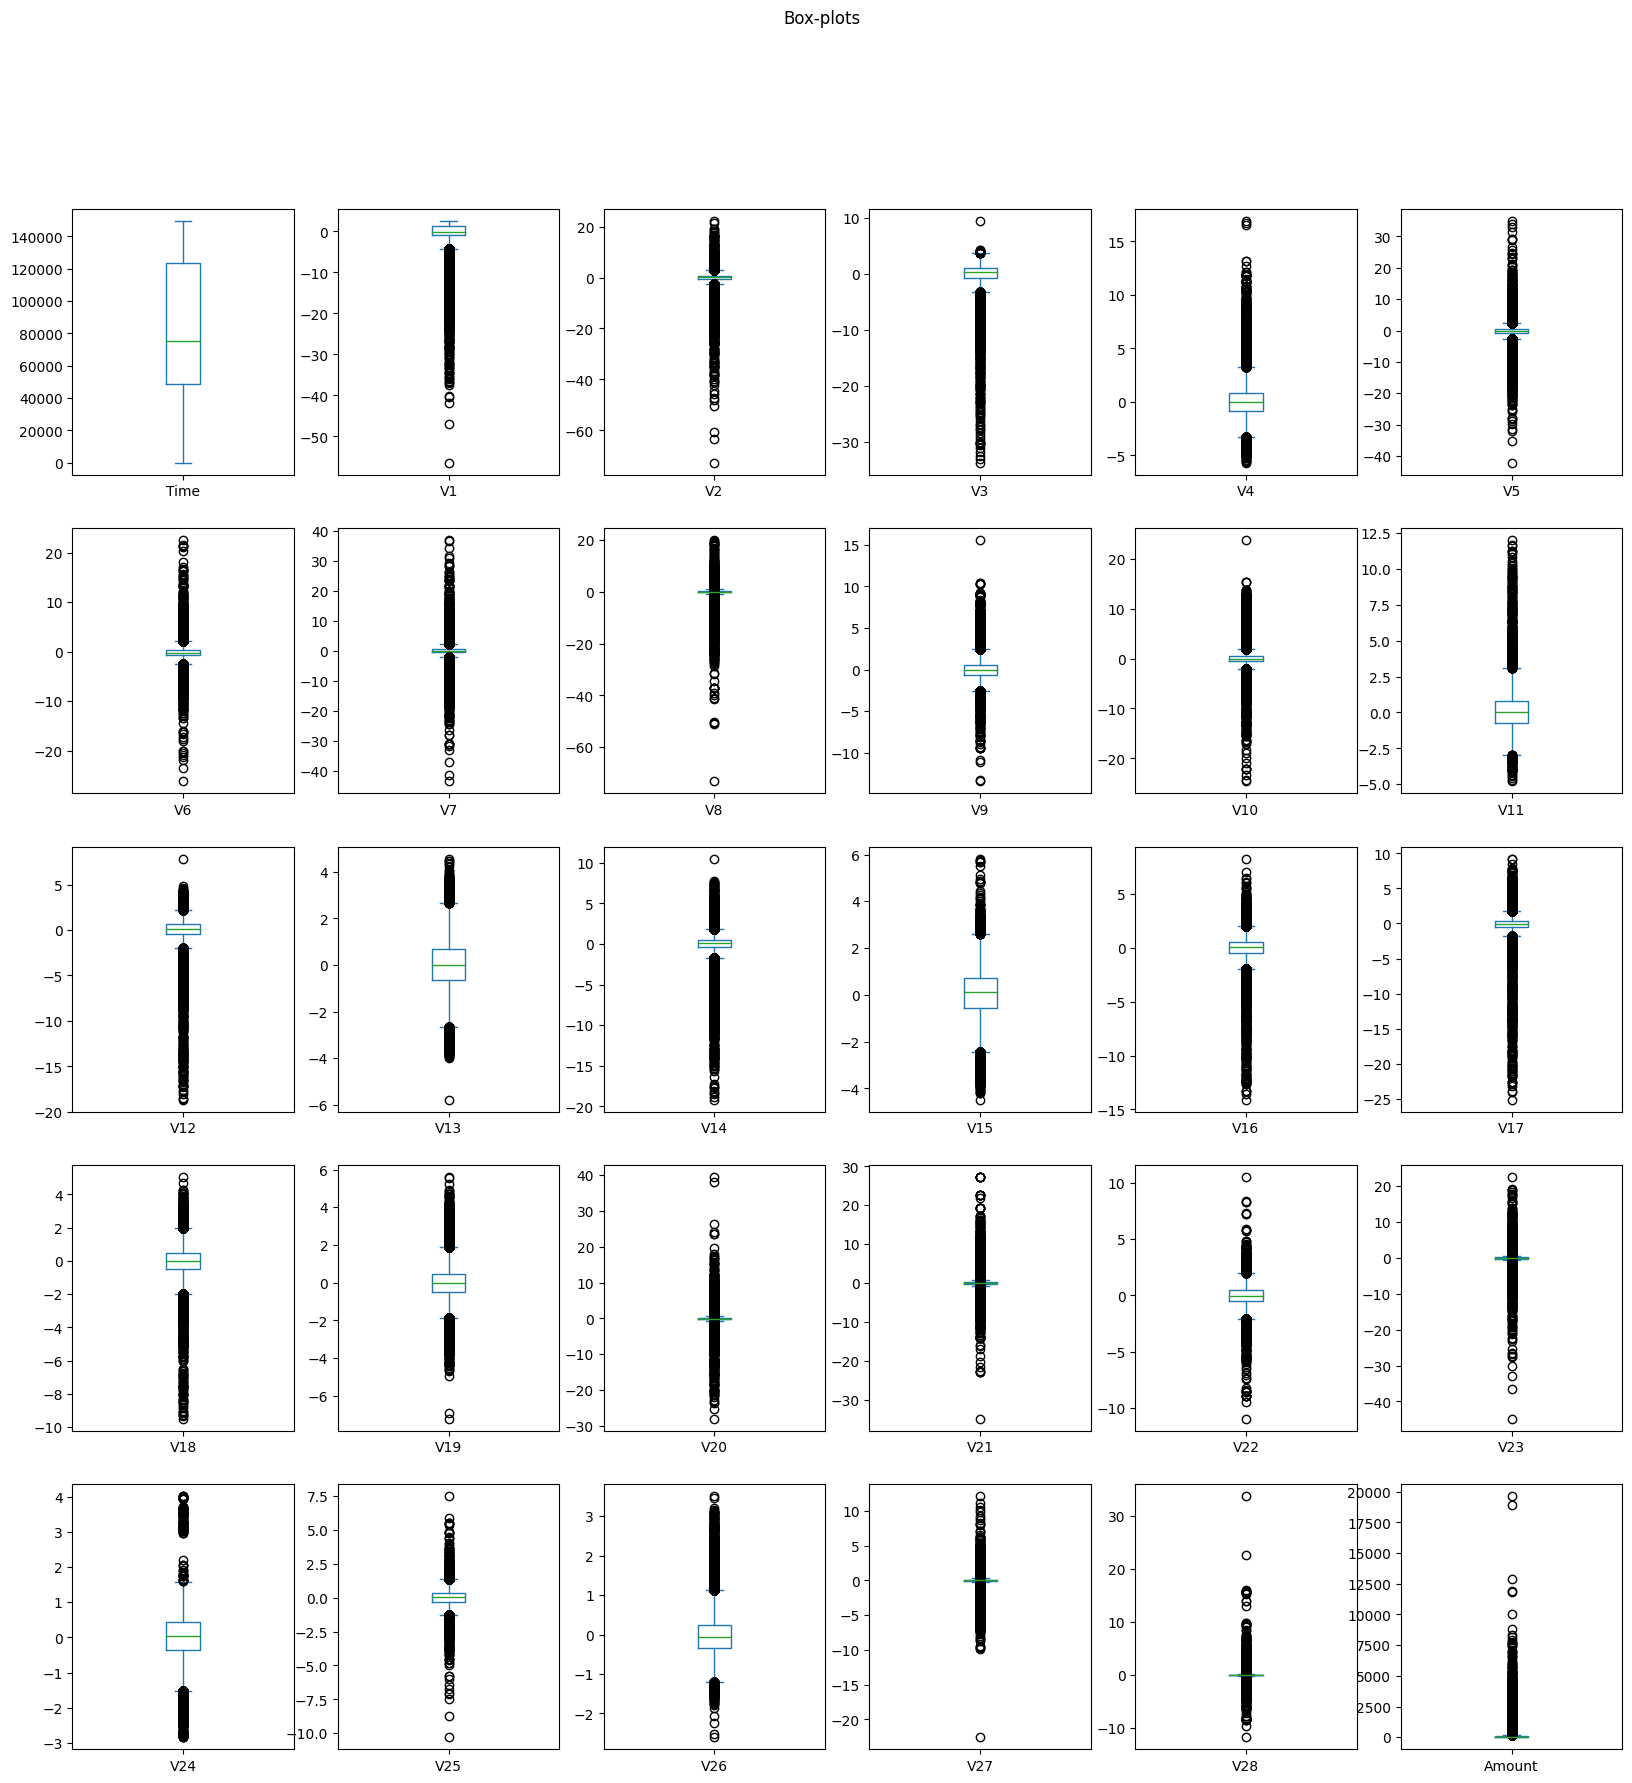

In [161]:
fig, axes = plt.subplots(5, 6, figsize=(20, 20))
fig.suptitle('Box-plots')

row = 0
col = 0

for ax, feature in enumerate(data_features):
    data_features[feature].plot.box(ax=axes[row, col])
    col += 1
    if col > 5:
        row += 1
        col = 0

In [162]:
def outlier_iqr(data, col, threshold=1.5):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    
    return anomalies, up_bound, low_bound

In [163]:
comparison_table, iqr_outliers = get_column_outliers(data_features, function=outlier_iqr)
anomalies_report(iqr_outliers)

Total number of outliers: 44683
Percentage of outliers:   18.80%


In [164]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
Amount,301.960000,-215.970000,15551.0,6.542390
V27,0.567411,-0.548517,14058.0,5.914277
V20,1.187569,-1.248869,11344.0,4.772482
V28,0.460030,-0.431307,11277.0,4.744295
V8,1.921280,-1.788525,9597.0,4.037510
V23,1.022511,-1.057800,7519.0,3.163284
V21,1.366722,-1.419670,6382.0,2.684942
V6,3.930949,-4.242764,4273.0,1.797674
V2,4.942353,-4.767724,3922.0,1.650007
V10,3.401442,-3.468765,2729.0,1.148105


# Clustering

**Distance-based**

In [185]:
class DistanceOutliers(BaseEstimator):
    """
    -----------
    Parameters:
    
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
        
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        

    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

Обязательно выполним масштабирование данных с помощью RobustScaler

In [186]:
scaler = RobustScaler()
scaled_data = pd.DataFrame(data=scaler.fit_transform(data_features), 
                          columns=data_features.columns)

Уменьшим размерность для визуализации данных

CPU times: user 3h 4min 13s, sys: 3min 14s, total: 3h 7min 27s
Wall time: 1h 55min 35s


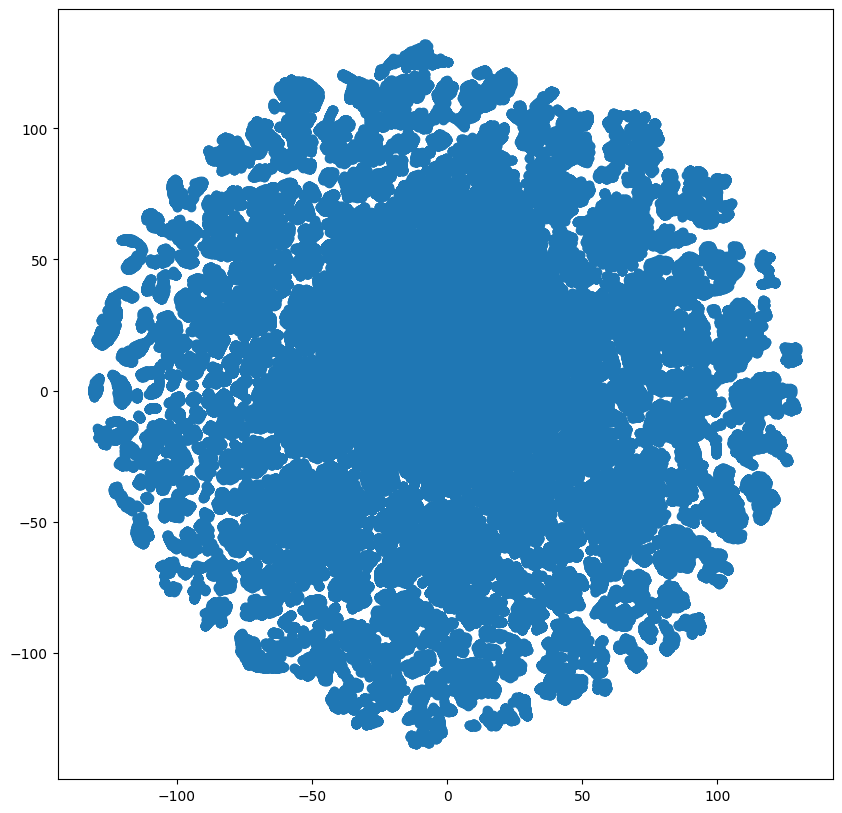

In [189]:
%%time
# tsne = TSNE(perplexity=50, n_jobs=-1)
tsne = TSNE(n_components=2, n_jobs=-1, random_state=10)
tsne_transformed = tsne.fit_transform(scaled_data)

plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1]);

Посмотрим на результаты в случае использования евклидовой нормы

In [191]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=95)
euclidian_model.fit(scaled_data)
euclidian_outliers = euclidian_model.predict(scaled_data)
anomalies_report(euclidian_outliers)

Total number of outliers: 11885
Percentage of outliers:   5.00%


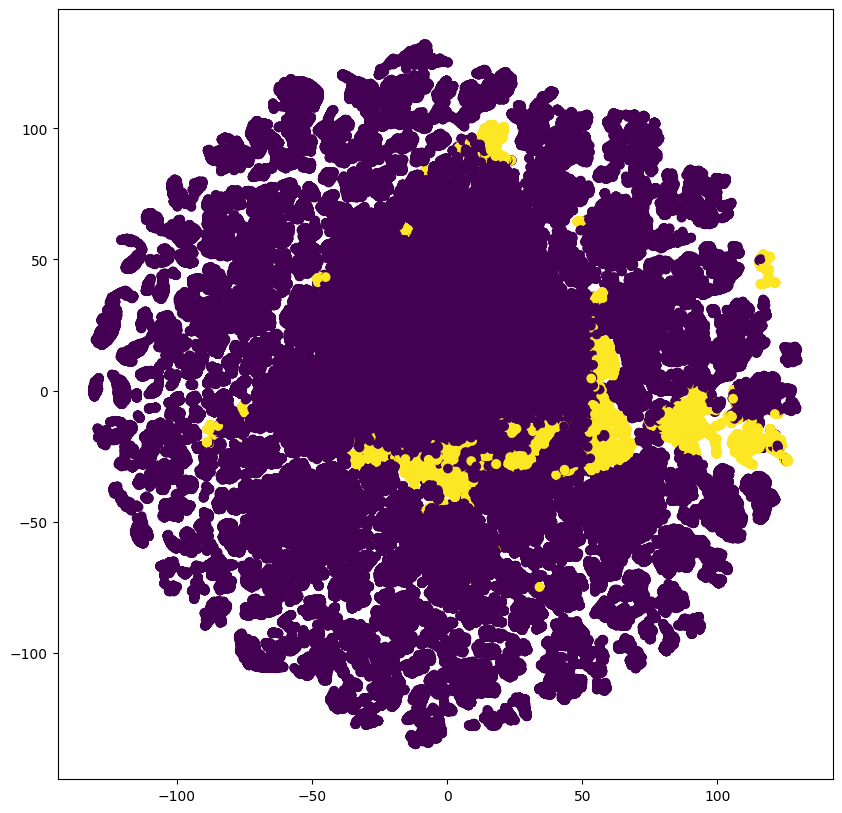

In [192]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=euclidian_outliers);

Посмотрим на результаты в случае использования манхетонской нормы

In [193]:
citiblock_model = DistanceOutliers(metric='cityblock', percentile=95)
citiblock_model.fit(scaled_data)
cityblock_outliers = citiblock_model.predict(scaled_data)
anomalies_report(cityblock_outliers)

labeled_data = data_features.copy()
labeled_data['is_outlier'] = cityblock_outliers

Total number of outliers: 11885
Percentage of outliers:   5.00%


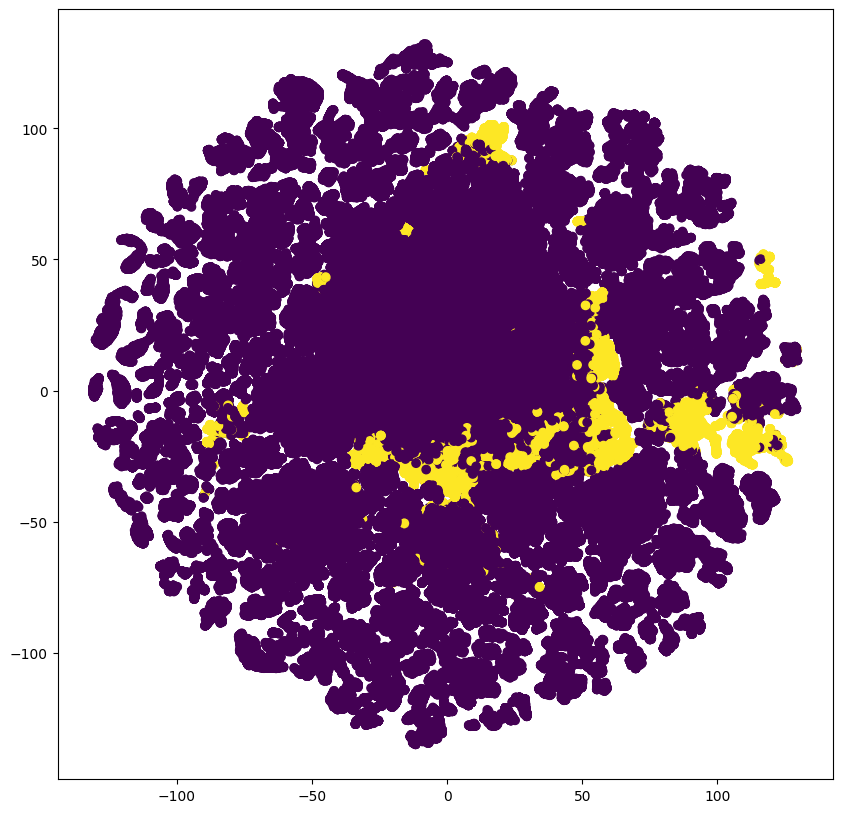

In [194]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=cityblock_outliers);

# Density-based

**DBSCAN**

Идея - аномалии должны сильно отличаться от основных данных и скорее всего попадут в "шум". Почему бы не увеличивать epsilon до тех пор, пока все "плотные" данные не окажутся в нескольких немногочисленных кластерах, а шума будет столько, сколько мы подозреваем должно быть аномалий

In [ ]:
# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.05
eps_history = [eps]
while outlier_percentage > 0.1:    
    model = DBSCAN(eps=eps, n_jobs=-1).fit(scaled_data)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels)) - 1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    # считаем текущий процент "шума"
    outlier_percentage = sum(labels == 1) / len(labels)    
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)
    
model = DBSCAN(eps, n_jobs=-1)
model.fit(scaled_data)
density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])

In [ ]:
eps

In [ ]:
anomalies_report(density_outlier)

In [ ]:
iterations = eps_history[:-1]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('number of clusters', color=color)
ax1.plot(iterations, num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('anomaly percentage', color=color)  
ax2.plot(iterations, anomaly_percentage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

In [ ]:
labeled_data = data_features.copy()
labeled_data['is_outlier'] = density_outlier

sns.pairplot(data=labeled_data, vars = other_features,
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'],  palette='bright');

# Unsupervised model-based

**One-Class SVM**

In [ ]:
one_class_svm = OneClassSVM(nu=0.05, gamma='auto')
one_class_svm.fit(scaled_data)
svm_outliers = one_class_svm.predict(scaled_data)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [ ]:
anomalies_report(svm_outliers)

In [ ]:
labeled_data = data_features.copy()
labeled_data['is_outlier'] = svm_outliers

sns.pairplot(data=labeled_data, vars=other_features,
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'],  palette='bright');

**Isolation Forest**

In [ ]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, 
                                   max_features=1.0, bootstrap=True, n_jobs=-1)
isolation_forest.fit(scaled_data)

isolation_outliers = isolation_forest.predict(scaled_data)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

In [ ]:
anomalies_report(isolation_outliers)

In [ ]:
labeled_data = data_features.copy()
labeled_data['is_outlier'] = isolation_outliers

sns.pairplot(data=labeled_data, vars = other_features,
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'],  palette='bright');

# Финальное сравнение

In [ ]:
summary = np.concatenate((
    [std_outliers], 
    [iqr_outliers], 
    [euclidian_outliers], 
    [cityblock_outliers],
    [density_outlier],
    [svm_outliers],
    [isolation_outliers]
))

In [ ]:
summary = pd.DataFrame(
    summary.T, 
    columns=['std', 'iqr', 'euclid', 'cityblock', 'dbscan', 'svm', 'isolation']
)
summary.head()

In [ ]:
summary.sum(axis=1).value_counts()

In [ ]:
outlier_score = summary.mean(axis=1)
plt.hist(outlier_score, alpha=0.6);

# Оценки качества работы моделей

In [ ]:
print('Std_outliers\n')
print(classification_report(fraudulent_transactions, sum(std_outliers), labels=[1, 2, 3]))
print(confusion_matrix(fraudulent_transactions, sum(std_outliers), labels=[1, 2, 3]))

In [ ]:
for method in range(len(summary)):
    print(f'{method}\n')
    print(classification_report(fraudulent_transactions, sum(method)))
    print(confusion_matrix(fraudulent_transactions, sum(method)))